### 1, Linear regression 

### 2, Gradient Descent

### 3, Polynomial Regression 

### 4, Regularization

### 5, Logist and Softmax Regression 

### P150 - P200

In [1]:
### linear reg 

import numpy as np 

X = 2 * np.random.rand(100,1) 
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
### use normal eqution 

X_b = np.c_[np.ones((100, 1)), X] # add 1 to the col 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best 

array([[4.20431967],
       [2.88087573]])

In [6]:
### using sk-learn 

from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X,y) 
lin_reg.intercept_, lin_reg.coef_

(array([4.20431967]), array([[2.88087573]]))

In [7]:
### prediction 

X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.20431967],
       [9.96607112]])

### Complexity 

In [8]:
### batch gradient descent 

# compute all partial derivatives of the cost function 

eta = 0.1 # learning rate 
n_iterations = 1000 
m = 100 

theta = np.random.randn(2,1) # initialzation 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

In [9]:
theta

array([[4.20431967],
       [2.88087573]])

In [10]:
# the convergence rate 

# O(1/iterations)

### Stochastic Gradient Descent

In [12]:
### gradually reduce the learning rate 

n_epochs = 50 
t0, t1 = 5, 50 # learning rate param 

def learning_schedule(t):
    return t0 / (t + t1) 

theta = np.random.randn(2,1) # initialization 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients

In [13]:
theta

array([[4.16338808],
       [2.82732983]])

In [15]:
### using SGDRegressor in sklearn 

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [16]:
### Mini-batch

# https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb

### Polynomial Regression 

In [17]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [19]:
### using sklearn 

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False) 
X_poly = poly_features.fit_transform(X) 



In [21]:
X[0]

array([-0.96101472])

In [22]:
X_poly[0]

array([-0.96101472,  0.92354929])

In [25]:
# now feed the linear reg 

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) 
lin_reg.intercept_,lin_reg.coef_

(array([1.90463218]), array([[1.02469113, 0.53104018]]))

In [26]:
# the combinatorial explosion

# degree d & feature n 

# --> (n + d)!/d!n!

### The learning Curves

In [37]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

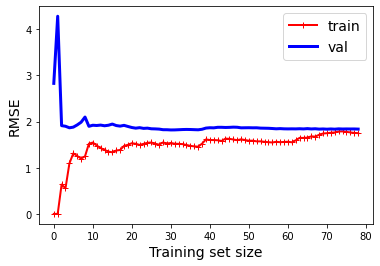

In [38]:
# plot 
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

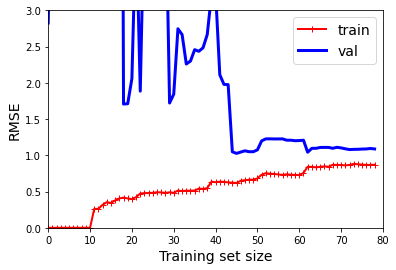

In [40]:
### look at the 10th-degree data 

from sklearn.pipeline import Pipeline 

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])  

In [41]:
### very large gap, suggesting the overfitting 

### Regularized Linear Models 

In [42]:
### A. Ridge Reg 

### B. Lasso Reg 

### C. Elastic net 


In [43]:
### tips: 

### scale the data first, use nomal test evaluation 

### A. J = MSE(x) + a/2(Sum(x^2))

In [46]:
# 1, use sklearn 

from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y) 
ridge_reg.predict([[1.5]])

array([[5.19280727]])

In [48]:
# 2, use SGD 

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.16677513])

### B. J = MSE(x) + a(Sum/x/)

In [49]:
# 1, use sklearn 

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X, y) 
lasso_reg.predict([[1.5]])

array([4.71819945])

### C. Elastic Net control the L1 & L2 with a mix ratio r

In [51]:
from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5) 
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.15043233])

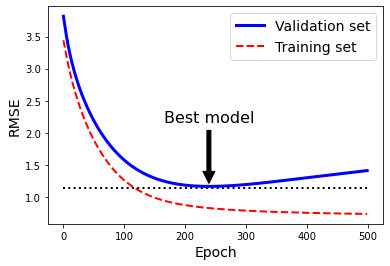

In [55]:
### scale and plot 


from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

### Early Stopping 

In [56]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

### Logistic Regression 

In [59]:
### get the datasets 

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

#print(iris.DESCR)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [60]:
X = iris["data"][:, 3:] # patal width 
y = (iris["target"] == 2).astype(np.int) # 1 if iris-virginica, else 0 

In [61]:
# logistic Reg 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

# P190

### Softmax Regression 

In [58]:
# compute the softmax score for each class 

# and then compute the exponantial normalized score 

# loss function by cross-entropy 
